<a href="https://colab.research.google.com/github/RaianaSeixas/Genial_case/blob/main/Case_genial_22_06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import datasets as ds

In [16]:
from six.moves.urllib.request import urlretrieve
urlretrieve('https://ndownloader.figshare.com/files/5976036')

('/tmp/tmpqu9lqka6', <http.client.HTTPMessage at 0x7f144db0d990>)

In [17]:
import ssl

In [18]:
  #Dados para o case:

#df = ds.fetch_openml(data_id=151,as_frame=True, return_X_y=True)
df = ds.fetch_openml(data_id=151, as_frame=True, return_X_y=True)
'''
(

    pd.concat(df, axis=1)

    .assign(target=lambda x: (x['class']=='UP')*1)

)
'''

"\n(\n\n  pd.concat(df, axis=1)\n\n  .assign(target=lambda x: (x['class']=='UP')*1)\n\n)\n"

In [19]:
X=pd.DataFrame(df[0])

In [20]:
X.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
X.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912


In [22]:
target = pd.DataFrame(df[1])
y = pd.DataFrame(df[1]) 

In [23]:
y['class'].replace(['UP', 'DOWN'],[1,0], inplace=True)



In [24]:
y.head()

,class
0,1
1,1
2,1
3,1
4,0


In [25]:
#split data in train and test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=101) 

rf = RandomForestClassifier(n_estimators=10, random_state=111) # create model
rf.fit(X_train, y_train) # training model

y_pred = rf.predict(X_test) #prediction step


print('**********  Complete Model Evaluation  ***********')
print()
print(" Accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   Recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))
print()

# Mesure of features importance
print('*********** 10 most important features with their effects  ***********')
print()
ft_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False) # getting feature importance

df=pd.DataFrame(ft_imp.head(10))
df.columns=['Effect'] # rename column
#nomes = X.keys()
#df.index.names =  nomes
#df.rename(index=nomes,inplace = True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


**********  Complete Model Evaluation  ***********

 Accuracy: 0.88621
Precision: 0.90316
   Recall: 0.82308
 f1 score: 0.86126

*********** 10 most important features with their effects  ***********



,Effect
3,0.310763
0,0.176373
5,0.119407
4,0.117932
2,0.106477
6,0.058423
7,0.056032
1,0.054593


Text(0.5, 0, 'Effect')

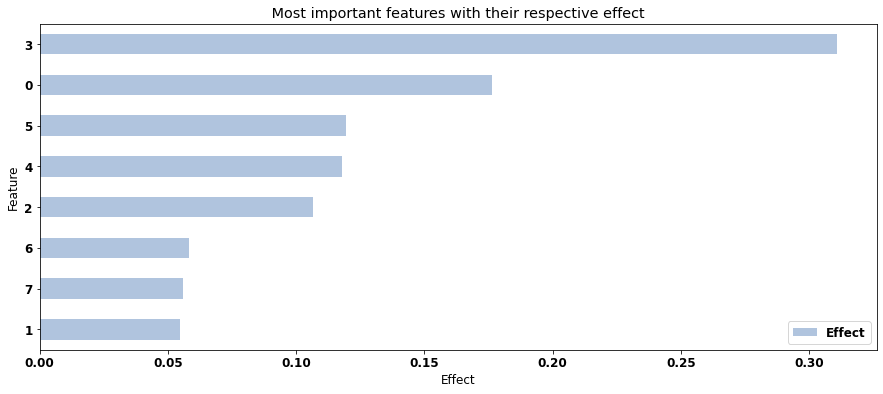

In [26]:
# #-------Vizualization-----------

# Let's print a chart containing the features whose effect is at least around 5%

df1=df.sort_values(by=['Effect'], ascending=True) # sort in ascending order for plot


font = {'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [15, 6] 

df1.plot(kind='barh', color='lightsteelblue')
plt.title(' Most important features with their respective effect ')
plt.ylabel('Feature')
plt.xlabel('Effect')